In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import time
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning


In [2]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [3]:
data = pd.read_csv('./data/cleaned_car_data.csv', index_col=0)

In [4]:
data.sample()

,milage,accident,price,horsepower,brand_alfa,brand_aston,brand_audi,brand_bentley,brand_bmw,brand_buick,...,brand_toyota,brand_volkswagen,brand_volvo,fuel_type_e85 flex fuel,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_hydrogen,fuel_type_plug-in hybrid,transmission_category_manual
192,0.185316,0.0,44798.0,0.720627,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [5]:
features = data.drop(["price"], axis=1)
target = data[["price"]]

In [6]:
X = features.values
y = target.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'MedAE': 'neg_median_absolute_error'
}

In [9]:
modelNames = ['Regresja Liniowa', 'Drzewo decyzyjne', 'Drzewo decyzyjne(3,5)', 'Drzewa decyzyjne(5,10)',
              'Las losowy', 'Las losowy(100,10)', 'Las losowy(30,none)', 'Regresja Ridge', 'Regresja Lasso',
              'SVM', 'SVM(linear, 0.1)', 'SVM(rbf, 2.0, scale)', 'Gradient Boosting Regressor',
              'Gradient Boosting Regressor(100,0.01)', 'Gradient Boosting Regressor(200,0.1)',
              'AdaBoost', 'AdaBoost(50, 1.0)', 'AdaBoost(100, 0.5)', 'Bagging(50)', 'Bagging(10)', 'Bagging(150)',
              'Stacking(lr+svr+rf)', 'Stacking(rf+svr)', 'Stacking(gb+dt)', 'Stacking(rf+br)']


In [10]:
models = {
    modelNames[0]: LinearRegression(),
    modelNames[1]: DecisionTreeRegressor(random_state=42),
    modelNames[2]: DecisionTreeRegressor(max_depth=3, min_samples_leaf=5),
    modelNames[3]: DecisionTreeRegressor(max_depth=5, min_samples_split=10),
    modelNames[4]: RandomForestRegressor(random_state=42),
    modelNames[5]: RandomForestRegressor(n_estimators=100, max_depth=10),
    modelNames[6]: RandomForestRegressor(n_estimators=50, max_depth=None),
    modelNames[7]: Ridge(),
    modelNames[8]: Lasso(),
    modelNames[9]: LinearSVR(random_state=42, dual='auto', max_iter=10000),
    modelNames[10]: LinearSVR(random_state=42, dual='auto', max_iter=10000, C=0.1),
    modelNames[11]: SVR(kernel='rbf', C=2.0, gamma='scale'),
    modelNames[12]: GradientBoostingRegressor(random_state=42),
    modelNames[13]: GradientBoostingRegressor(n_estimators=100, learning_rate=0.01),
    modelNames[14]: GradientBoostingRegressor(n_estimators=200, learning_rate=0.1),
    modelNames[15]: AdaBoostRegressor(random_state=42, n_estimators=50),
    modelNames[16]: AdaBoostRegressor(n_estimators=50, learning_rate=1.0),
    modelNames[17]: AdaBoostRegressor(n_estimators=100, learning_rate=0.5),
    modelNames[18]: BaggingRegressor(random_state=42, n_estimators=50),
    modelNames[19]: BaggingRegressor(n_estimators=10),
    modelNames[20]: BaggingRegressor(n_estimators=150),
    modelNames[21]: StackingRegressor(estimators=[
                                                     ('lr', LinearRegression()),
                                                     ('svr', LinearSVR(random_state=42, dual='auto')),
                                                     ('rf', RandomForestRegressor(random_state=42))
                                                 ], final_estimator=Ridge()),
    modelNames[22]: StackingRegressor(estimators=[
                                                     ('rf', RandomForestRegressor(n_estimators=10)),
                                                     ('svr', LinearSVR(random_state=42, dual='auto'))
                                                 ], final_estimator=Ridge()),
    modelNames[23]: StackingRegressor(estimators=[
                                                     ('gb', GradientBoostingRegressor(n_estimators=50)),
                                                     ('dt', DecisionTreeRegressor(max_depth=5))
                                                 ], final_estimator=Ridge()),
    modelNames[24]: StackingRegressor(estimators=[
                                                     ('rf', RandomForestRegressor(random_state=42)),
                                                     ('br', BaggingRegressor(n_estimators=150))
                                                 ], final_estimator=Ridge())
}

In [11]:
results = {}
normResultsMAE=[]
normResultsMSE=[]
normResultsMedAE=[]
timeResults=[]

for index, element in enumerate(modelNames):
    start_time = time.time()
    results[element] = cross_validate(models[element], X, y, cv=kf, scoring=scoring, return_train_score=False)
    end_time = time.time()
    timeResults.append(end_time - start_time)
    normResultsMAE.append(-np.mean(results[element]['test_MAE']))
    normResultsMSE.append(-np.mean(results[element]['test_MSE']))
    normResultsMedAE.append(-np.mean(results[element]['test_MedAE']))
    print(f"{element}: {normResultsMAE[-1]:.2f}, {normResultsMSE[-1]:.2f}, {normResultsMedAE[-1]:.2f}, {timeResults[-1]:.2f}")

Regresja Liniowa: 211099613311267.06, 173812395595154693969839176810496.00, 9945.34, 0.40
Drzewo decyzyjne: 15945.86, 4118039542.90, 7222.00, 0.24
Drzewo decyzyjne(3,5): 20723.06, 4439781165.39, 10044.09, 0.07
Drzewa decyzyjne(5,10): 18209.00, 4263788427.41, 7882.26, 0.08
Las losowy: 13212.28, 3465608244.82, 5997.83, 6.53
Las losowy(100,10): 13973.88, 3671048612.39, 6522.12, 3.63
Las losowy(30,none): 13239.29, 3463362404.73, 5952.23, 3.34
Regresja Ridge: 18012.28, 3749930906.03, 10097.95, 0.35
Regresja Lasso: 17860.09, 3754236929.06, 9880.32, 0.98
SVM: 38549.07, 6758127727.20, 25724.26, 0.24
SVM(linear, 0.1): 43486.99, 7181498232.18, 30736.52, 0.19
SVM(rbf, 2.0, scale): 26280.25, 5435423549.97, 15124.55, 3.40
Gradient Boosting Regressor: 15276.80, 4263471195.11, 7229.72, 1.90
Gradient Boosting Regressor(100,0.01): 19783.16, 4021847496.38, 13296.70, 1.89
Gradient Boosting Regressor(200,0.1): 14916.99, 4564472699.95, 6606.95, 3.69
AdaBoost: 42405.56, 7668912702.50, 30467.25, 4.33
AdaBoos

/home/mkapala/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.64437e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.13749e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.93957e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mkapala/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.34861e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/mkapala/.local/lib/python3.10/site-package

Stacking(lr+svr+rf): 14694.97, 3492035801.76, 8661.00, 35.83
Stacking(rf+svr): 14961.49, 3546489741.54, 8636.95, 4.52
Stacking(gb+dt): 16183.29, 3945678066.57, 8716.12, 5.36
Stacking(rf+br): 14044.91, 3502963696.13, 7590.82, 116.66


In [12]:
resultsMAE = pd.DataFrame({'Model': modelNames,'MAE': normResultsMAE})
resultsMSE = pd.DataFrame({'Model': modelNames, 'MSE': normResultsMSE})
resultsMedAE = pd.DataFrame({'Model': modelNames,'MedAE': normResultsMedAE})
resultsTime = pd.DataFrame({'Model': modelNames,'Time': timeResults})

print(resultsMAE.sort_values(by='MAE'),end="\n\n")
print(resultsMSE.sort_values(by='MSE'),end="\n\n")
print(resultsMedAE.sort_values(by='MedAE'),end="\n\n")
print(resultsTime.sort_values(by='Time'),end="\n\n")

                                    Model           MAE
18                            Bagging(50)  1.302846e+04
20                           Bagging(150)  1.317521e+04
4                              Las losowy  1.321228e+04
6                     Las losowy(30,none)  1.323929e+04
19                            Bagging(10)  1.396354e+04
5                      Las losowy(100,10)  1.397388e+04
24                        Stacking(rf+br)  1.404491e+04
21                    Stacking(lr+svr+rf)  1.469497e+04
14   Gradient Boosting Regressor(200,0.1)  1.491699e+04
22                       Stacking(rf+svr)  1.496149e+04
12            Gradient Boosting Regressor  1.527680e+04
1                        Drzewo decyzyjne  1.594586e+04
23                        Stacking(gb+dt)  1.618329e+04
8                          Regresja Lasso  1.786009e+04
7                          Regresja Ridge  1.801228e+04
3                  Drzewa decyzyjne(5,10)  1.820900e+04
13  Gradient Boosting Regressor(100,0.01)  1.978

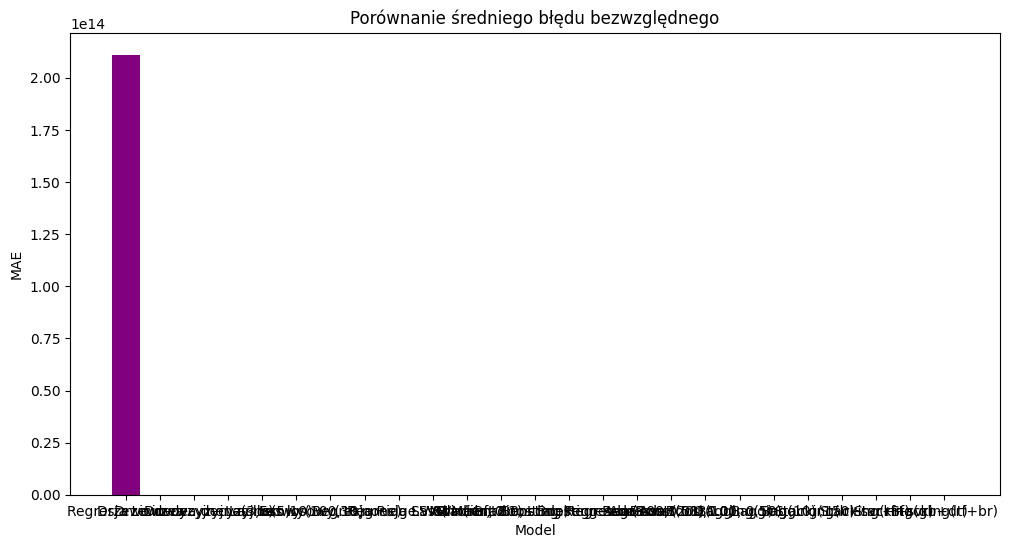

In [13]:
plt.figure(figsize=(16, 6))
plt.bar(resultsMAE['Model'], resultsMAE['MAE'], color='purple')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Porównanie średniego błędu bezwzględnego')
plt.show()

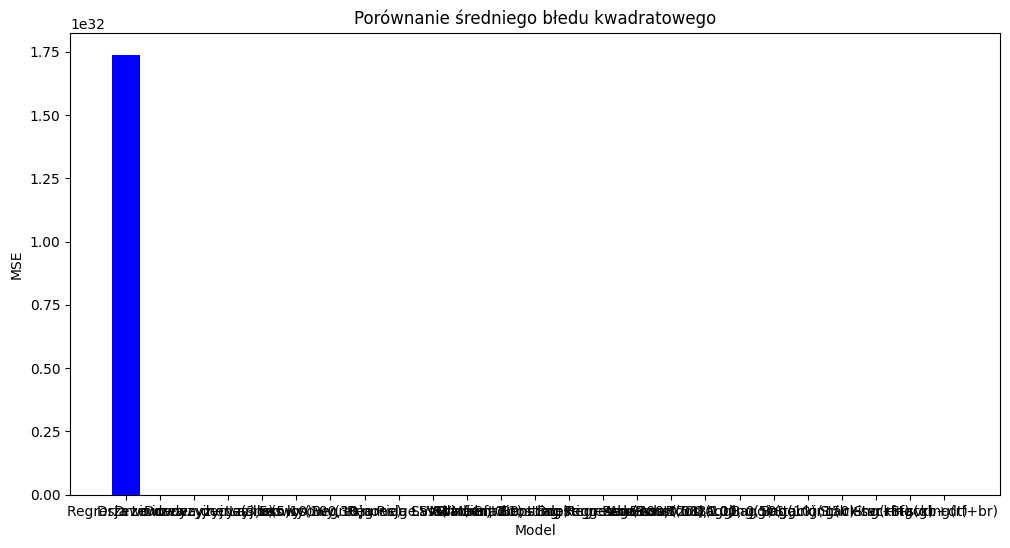

In [14]:
plt.figure(figsize=(16, 6))
plt.bar(resultsMSE['Model'], resultsMSE['MSE'], color='blue')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Porównanie średniego błedu kwadratowego')
plt.show()



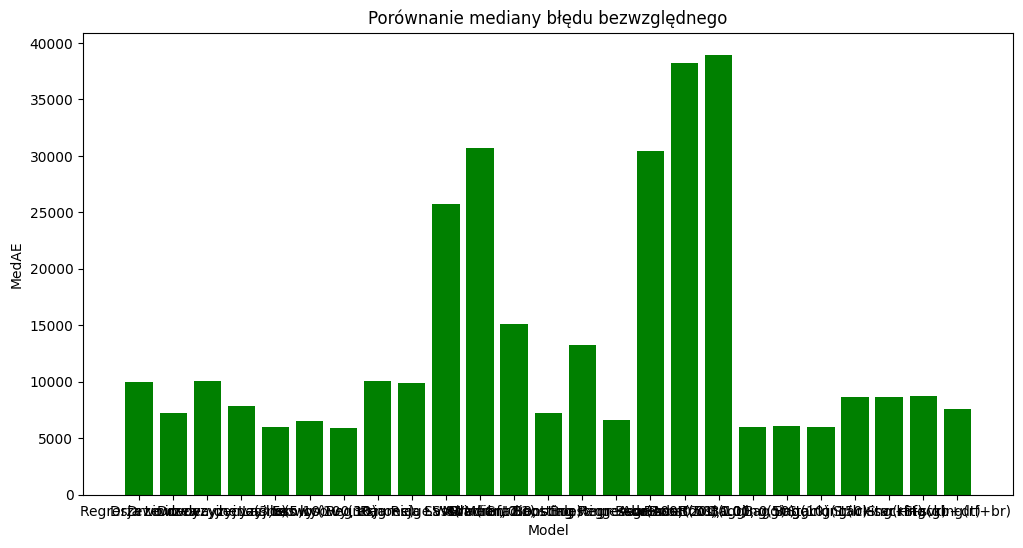

In [15]:
plt.figure(figsize=(16, 6))
plt.bar(resultsMedAE['Model'], resultsMedAE['MedAE'], color='green')
plt.xlabel('Model')
plt.ylabel('MedAE')
plt.title('Porównanie mediany błędu bezwzględnego')
plt.show()



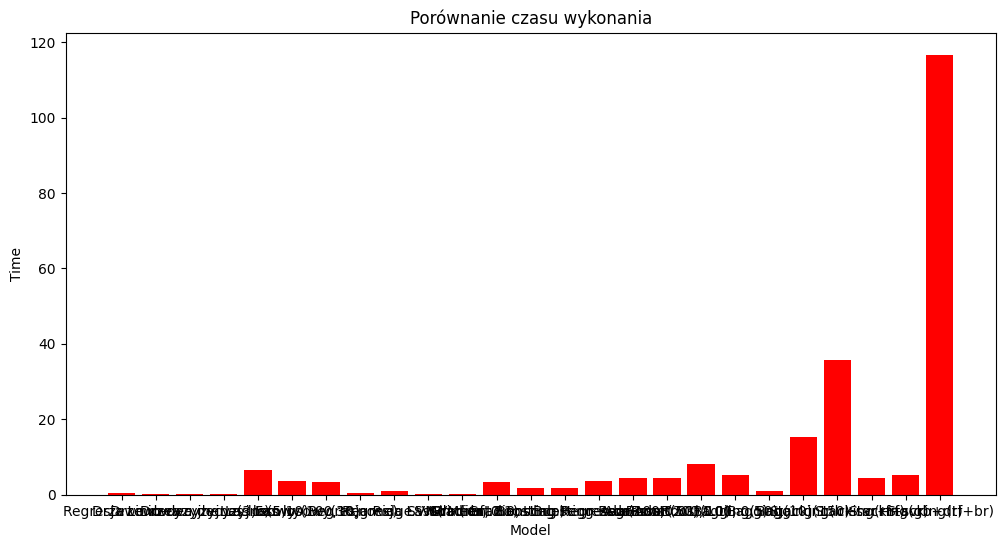

In [16]:
plt.figure(figsize=(16, 6))
plt.bar(resultsTime['Model'], resultsTime['Time'], color='red')
plt.xlabel('Model')
plt.ylabel('Time')
plt.title('Porównanie czasu wykonania')
plt.show()

In [ ]:
model = models['Bagging(50)'].fit(X, )